In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [74]:
traindf= pd.read_csv("C:\\Users\\DeLL\\AI\\train.csv")

In [75]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [76]:
numeric_df = traindf.select_dtypes(include= 'number')
correlation_matrix= numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

#### Chossing the required train dataset from the given dataset based on conditions given and correlation matrix

In [106]:
req_tr= ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','FullBath','TotRmsAbvGrd','SalePrice']

In [107]:
selected_tr =traindf[req_tr]

In [108]:
selected_tr.isna().any()

OverallQual     False
GrLivArea       False
GarageArea      False
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
BsmtFullBath    False
BsmtHalfBath    False
HalfBath        False
FullBath        False
TotRmsAbvGrd    False
SalePrice       False
dtype: bool

In [109]:
selected_tr.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
                                  selected_tr['HalfBath'].fillna(0) +
                                  selected_tr['FullBath'].fillna(0) +
                                  selected_tr['BsmtHalfBath'].fillna(0))

selected_tr.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +
                                  selected_tr['1stFlrSF'].fillna(0) +
                                  selected_tr['2ndFlrSF'].fillna(0) +
                                  selected_tr['LowQualFinSF'].fillna(0) +
                                  selected_tr['GrLivArea'].fillna(0))

In [110]:
selected_tr.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,FullBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,7,1710,548,856,856,854,0,1,0,1,2,8,208500,4,4276
1,6,1262,460,1262,1262,0,0,0,1,0,2,6,181500,3,3786
2,7,1786,608,920,920,866,0,1,0,1,2,6,223500,4,4492
3,7,1717,642,756,961,756,0,1,0,0,1,7,140000,2,4190
4,8,2198,836,1145,1145,1053,0,1,0,1,2,9,250000,4,5541


In [111]:
train_df= selected_tr[['OverallQual','GarageArea','TotRmsAbvGrd','SalePrice','TotalBath','TotalSF']]

In [112]:
train_df

,OverallQual,GarageArea,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,7,548,8,208500,4,4276
1,6,460,6,181500,3,3786
2,7,608,6,223500,4,4492
3,7,642,7,140000,2,4190
4,8,836,9,250000,4,5541
...,...,...,...,...,...,...
1455,6,460,7,175000,3,4247
1456,6,500,7,210000,3,5688
1457,7,252,9,266500,2,5832
1458,5,240,5,142125,2,3234


In [113]:
columns = ['OverallQual','GarageArea','TotRmsAbvGrd','SalePrice','TotalBath','TotalSF']

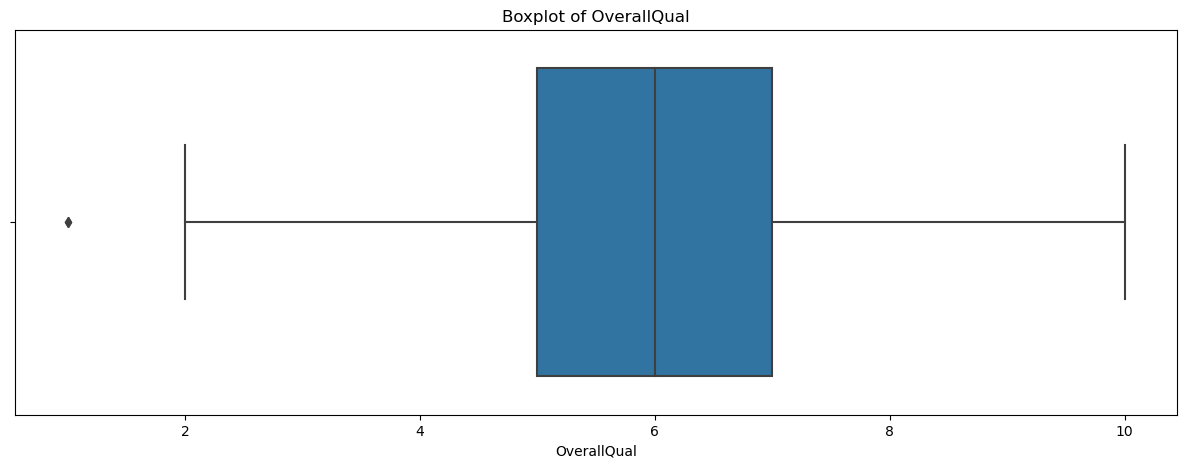

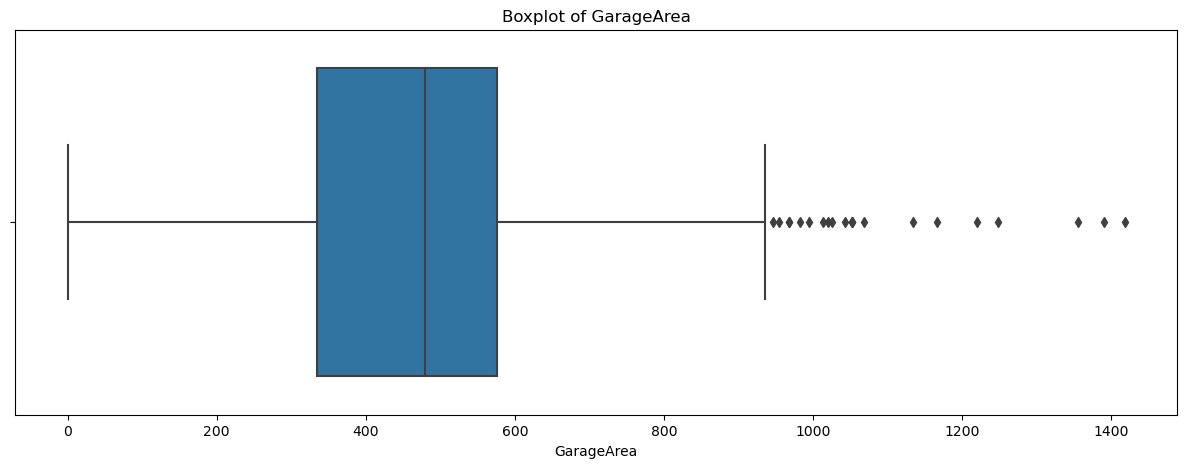

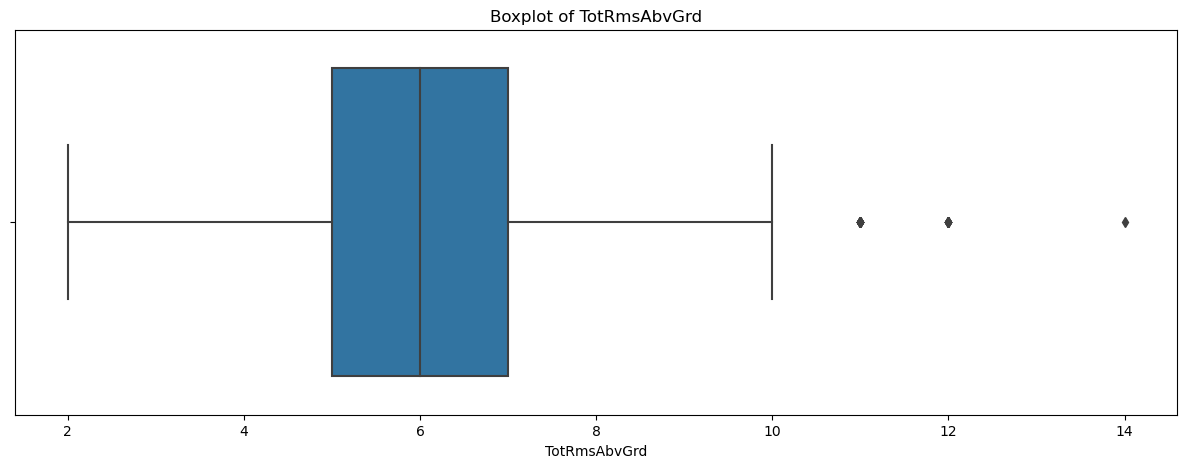

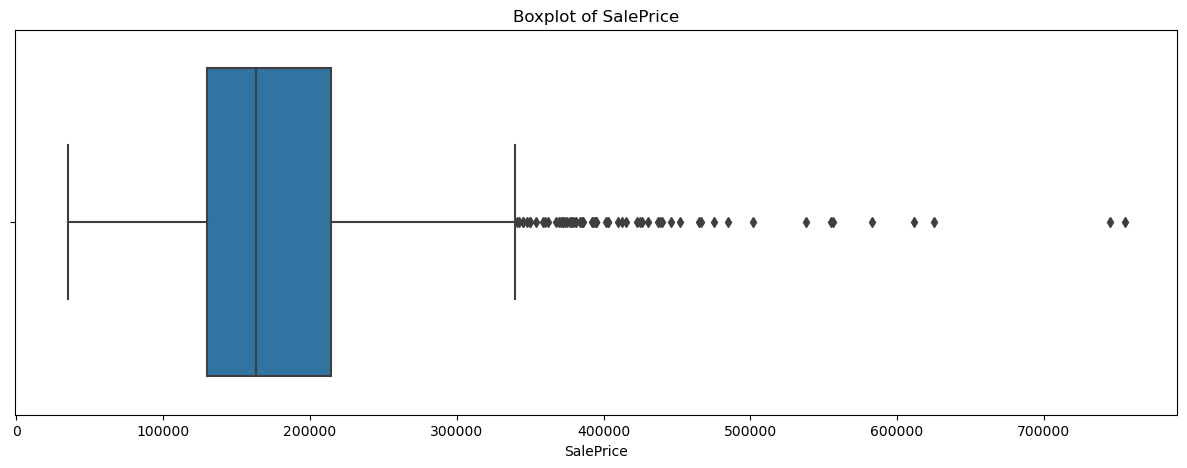

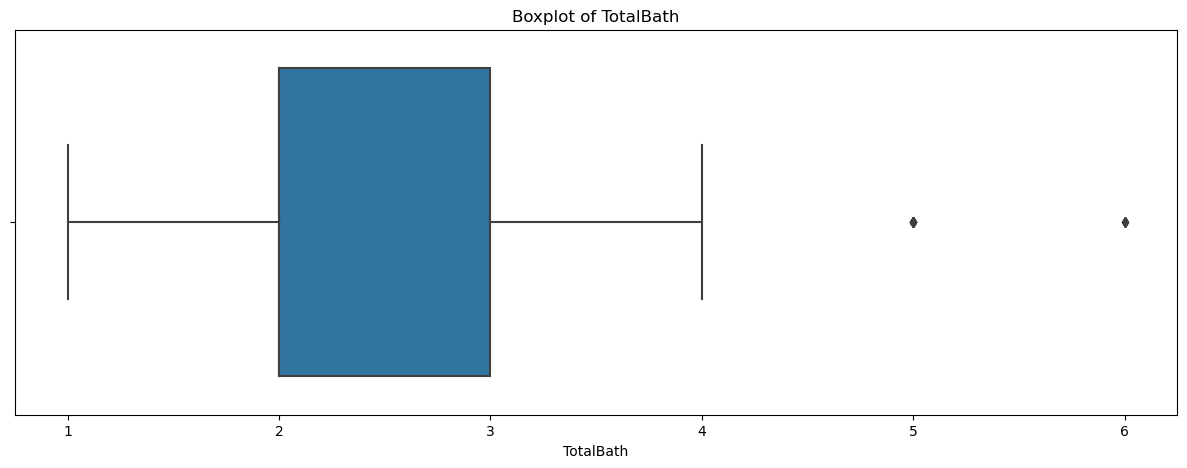

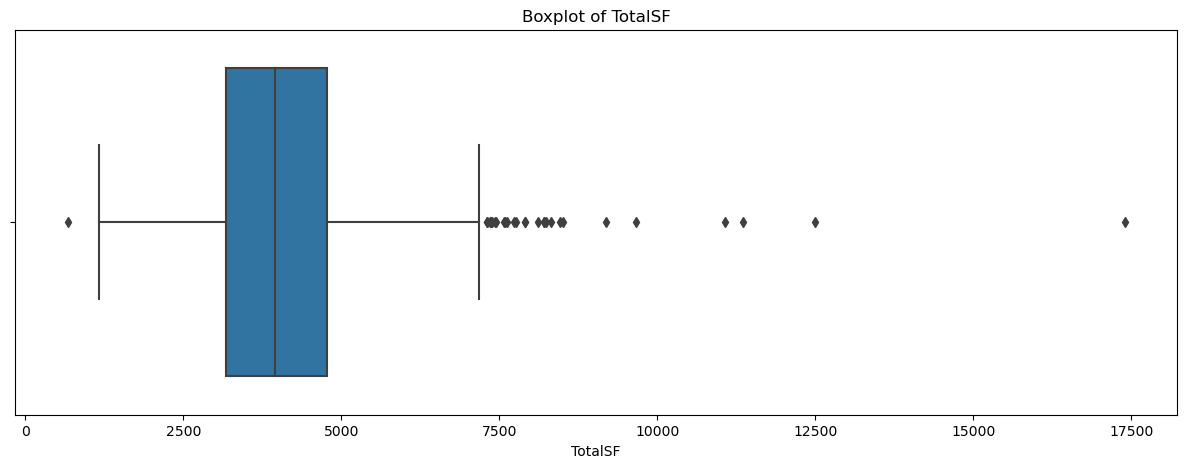

In [114]:
for column in columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [115]:
# Handle outliers by capping them based on z-scores
from scipy.stats import zscore

for column in columns:
    mean = train_df[column].mean()
    std_dev = train_df[column].std()
    
    # Define the lower and upper bounds
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    train_df[column] = np.where(train_df[column] < lower_bound, lower_bound, train_df[column])
    train_df[column] = np.where(train_df[column] > upper_bound, upper_bound, train_df[column])

print("\nOutliers handled by capping based on z-score.")


Outliers handled by capping based on z-score.


# Creating a Model using Pipeline

In [116]:
train_set , test_set = train_test_split(train_df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

1168
292


In [117]:
housing= train_set.drop('SalePrice', axis=1)
housing_labels = train_set['SalePrice'].copy()

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [119]:
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy= 'median')),('std_scaler', StandardScaler())])

In [120]:
X_train = my_pipeline.fit_transform(housing)

In [121]:
X_train

array([[-0.82498011, -0.87004602, -0.97441795, -0.48531499, -0.12909925],
       [-0.09049098, -0.45814638,  0.27905985,  0.61836883, -0.12992772],
       [-0.82498011, -2.27816804, -1.60115685, -1.58899882, -1.41654828],
       ...,
       [-0.82498011,  0.46144351, -0.97441795, -0.48531499, -1.24753953],
       [ 0.64399815, -1.24362941,  0.27905985, -0.48531499, -0.27656767],
       [ 0.64399815,  0.8829222 ,  0.27905985, -0.48531499,  0.31910534]])

In [122]:
Y_train = housing_labels

In [123]:
Y_train

254     145000.0
1066    178000.0
638      85000.0
799     175000.0
380     127000.0
          ...   
1095    176432.0
1130    135000.0
1294    115000.0
860     189950.0
1126    174000.0
Name: SalePrice, Length: 1168, dtype: float64

# Co-Relation of the dataset with SalesPrice

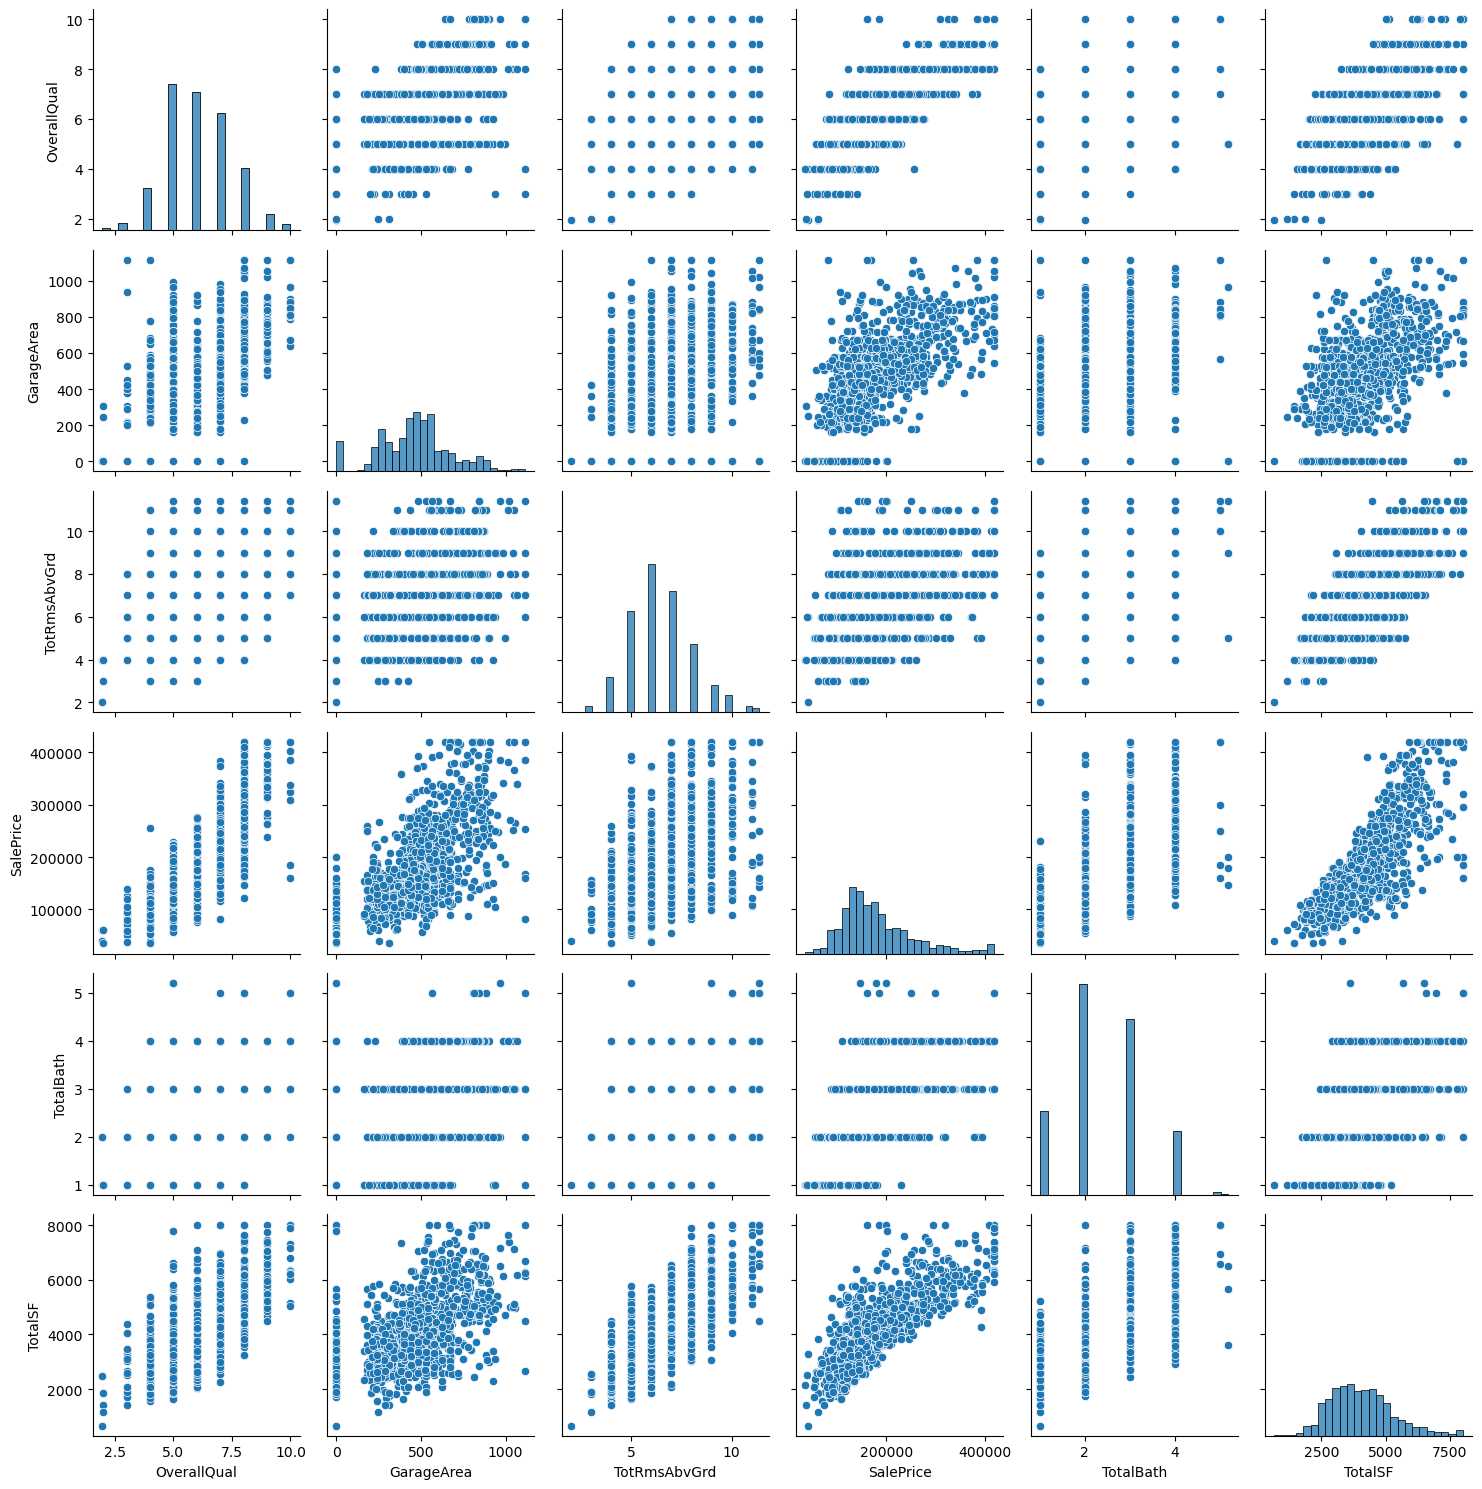

In [124]:
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [125]:
correlation_matrix= train_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.811365
TotalSF         0.807524
GarageArea      0.650517
TotalBath       0.629180
TotRmsAbvGrd    0.537657
Name: SalePrice, dtype: float64

<Axes: >

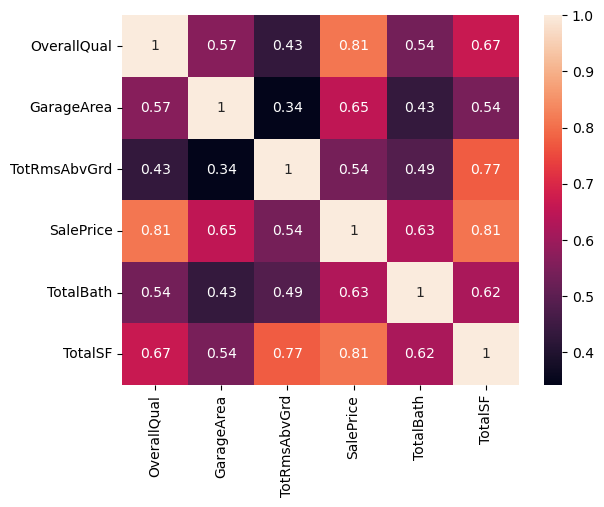

In [126]:
sns.heatmap(train_df.corr(), annot= True)

# Working with test Dataframe

In [127]:
testdf= pd.read_csv('C:\\Users\\DeLL\\AI\\test.csv')

In [128]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [132]:
req_tst= ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','FullBath','TotRmsAbvGrd']

In [133]:
selected_tst =testdf[req_tst]

In [134]:
selected_tst.loc[:, 'TotalBath'] = (selected_tr['BsmtFullBath'].fillna(0) +
                                  selected_tr['HalfBath'].fillna(0) +
                                  selected_tr['FullBath'].fillna(0) +
                                  selected_tr['BsmtHalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tr['TotalBsmtSF'].fillna(0) +
                                  selected_tr['1stFlrSF'].fillna(0) +
                                  selected_tr['2ndFlrSF'].fillna(0) +
                                  selected_tr['LowQualFinSF'].fillna(0) +
                                  selected_tr['GrLivArea'].fillna(0))

In [135]:
selected_tst

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,FullBath,TotRmsAbvGrd,TotalBath,TotalSF
0,5,896,730.0,882.0,896,0,0,0.0,0.0,0,1,5,4,4276
1,6,1329,312.0,1329.0,1329,0,0,0.0,0.0,1,1,6,3,3786
2,5,1629,482.0,928.0,928,701,0,0.0,0.0,1,2,6,4,4492
3,6,1604,470.0,926.0,926,678,0,0.0,0.0,1,2,7,2,4190
4,8,1280,506.0,1280.0,1280,0,0,0.0,0.0,0,2,5,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,546,546,0,0.0,0.0,1,1,5,3,3663
1455,4,1092,286.0,546.0,546,546,0,0.0,0.0,1,1,6,3,4247
1456,5,1224,576.0,1224.0,1224,0,0,1.0,0.0,0,1,7,3,5688
1457,5,970,0.0,912.0,970,0,0,0.0,1.0,0,1,6,2,5832


In [136]:
test_df_unproc= selected_tst[['OverallQual','GarageArea','TotRmsAbvGrd','TotalBath','TotalSF']]

In [137]:
test_df_unproc

,OverallQual,GarageArea,TotRmsAbvGrd,TotalBath,TotalSF
0,5,730.0,5,4,4276
1,6,312.0,6,3,3786
2,5,482.0,6,4,4492
3,6,470.0,7,2,4190
4,8,506.0,5,4,5541
...,...,...,...,...,...
1454,4,0.0,5,3,3663
1455,4,286.0,6,3,4247
1456,5,576.0,7,3,5688
1457,5,0.0,6,2,5832


In [144]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [145]:
X_test= my_pipeline.transform(test_df[['OverallQual','GarageArea','TotRmsAbvGrd','TotalBath','TotalSF']].values)

In [146]:
X_test

array([[-0.82498011,  1.21818935, -0.97441795,  1.72205266,  0.14761116],
       [-0.09049098, -0.78383447, -0.34767905,  0.61836883, -0.25834123],
       [-0.82498011,  0.03038574, -0.34767905,  1.72205266,  0.32656161],
       ...,
       [-0.82498011,  0.48060163,  0.27905985,  0.61836883,  1.31741685],
       [-0.82498011, -2.27816804, -0.34767905, -0.48531499,  1.43671715],
       [ 0.64399815,  0.8350269 ,  1.53253765, -0.48531499, -0.71565904]])

# Using Model

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
model= LinearRegression() 

In [215]:
model.fit(X_train, Y_train)

LinearRegression()

In [216]:
y_train_pred= model.predict(X_train)

In [217]:
y_train_pred[:5]

array([146688.59440746, 171015.29381966,  82674.78632077, 151994.99674583,
       155644.31400439])

In [218]:
Y_train[:5]

254     145000.0
1066    178000.0
638      85000.0
799     175000.0
380     127000.0
Name: SalePrice, dtype: float64

In [219]:
np.abs(y_train_pred - Y_train)

254      1688.594407
1066     6984.706180
638      2325.213679
799     23005.003254
380     28644.314004
            ...     
1095     6188.372309
1130    37364.422978
1294     7994.209400
860     20958.676214
1126    39179.971706
Name: SalePrice, Length: 1168, dtype: float64

In [220]:
np.mean(np.abs(y_train_pred - Y_train))

22829.24113500831

# Cross Validation

In [221]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, X_train, Y_train, scoring= 'neg_mean_squared_error', cv=200)
rmse_scores= np.sqrt(-scores)

In [222]:
rmse_scores

array([ 18542.22336692,  19662.69108958,  29281.86832874,  27821.09130728,
        39943.94434549,  13501.81822895,  27048.22766271,  26421.47362417,
        17112.10469374,  40751.7786251 ,  15064.60196776,  28108.82997517,
        13106.34739912,  16948.49519856,  26339.81315572,  27901.56994529,
        27290.45433143,  42608.29051637,  46820.8312146 ,  23823.72568923,
        51531.99792455,  15805.86475779,  17621.63239945,  26750.30284734,
        33849.72896906,  14541.68325866,  37922.75365294,  26144.14375497,
        33097.92768742,  39425.74894256,  14428.33968014,  25357.51451583,
        39316.99295803,  25854.57363316,  37517.62215538,  16343.09552304,
        17101.96771415,  24655.12753398,  30873.54974564,  35874.6083245 ,
        23310.26119877,  18478.07360306,  29835.49467519,  32989.7641977 ,
        31430.66713368,  40076.54599014,  27255.94017873,  26067.24861206,
        34524.14171948,  25732.64102287,  18838.62727772,  42645.23330092,
        24660.26653549,  

In [223]:
def print_scores(scores):
    print("Scores:" , scores)
    print("Mean:" , scores.mean())
    print("Standard Deviation:" , scores.std())

In [224]:
print_scores(rmse_scores)

Scores: [ 18542.22336692  19662.69108958  29281.86832874  27821.09130728
  39943.94434549  13501.81822895  27048.22766271  26421.47362417
  17112.10469374  40751.7786251   15064.60196776  28108.82997517
  13106.34739912  16948.49519856  26339.81315572  27901.56994529
  27290.45433143  42608.29051637  46820.8312146   23823.72568923
  51531.99792455  15805.86475779  17621.63239945  26750.30284734
  33849.72896906  14541.68325866  37922.75365294  26144.14375497
  33097.92768742  39425.74894256  14428.33968014  25357.51451583
  39316.99295803  25854.57363316  37517.62215538  16343.09552304
  17101.96771415  24655.12753398  30873.54974564  35874.6083245
  23310.26119877  18478.07360306  29835.49467519  32989.7641977
  31430.66713368  40076.54599014  27255.94017873  26067.24861206
  34524.14171948  25732.64102287  18838.62727772  42645.23330092
  24660.26653549  25308.64804648  26178.77484575  22008.53627498
  19786.45589648  27363.20077615  47678.93372526  38111.58992774
  90551.1147405   3

In [228]:
y_pred = model.predict(X_test)

In [229]:
y_pred

array([197637.87593161, 168053.55799828, 185490.64103128, ...,
       210454.13588796, 179850.40729796, 166837.91623393])

In [231]:
pred= pd.DataFrame(y_pred)

In [233]:
sub_df = pd.read_csv('sample_submission.csv')

In [235]:
datasets= pd.concat([sub_df['Id'],pred] , axis=1)

In [236]:
datasets.columns = ['Id','SalePrice']

In [237]:
datasets.to_csv('sample_submission.csv', index= False)

In [ ]:
dat